In [163]:
import nibabel as nib
import numpy as np
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge
from sklearn.decomposition import TruncatedSVD, KernelPCA, PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt,atan2,pi,ceil,acos,sin,cos
from sklearn.metrics import hamming_loss

from orelmisc import n_max,n_test_max,testpre,trainpre,saveCSV,shape_3d_org
from preprocess import flatten,flatten_each_sample,loadData,flatten_each_sample,precompute_and_save

In [164]:
prep_ = lambda i: cap(i)
def prep(a):
  return map(prep_single,a)

prep_single = lambda pi:map(prep_,pi)

cap = lambda p: 0 if min(1,max(0,p)) < 0.5 else 1
def pred_to_rgb(p):
  p = cap(p)
  v = p
  return (1-v,v,0.2)

y = np.zeros((n_max,3))
# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

result = None
xa = 0
x = None
x_t = None
TO_RADIANS = pi/180

In [175]:
space = 40 #35 # 35,50,70,100,150
hSize = 0 #space-1
bins = np.linspace(1,1700,space)
sbins = bins[:-1]+1800/space/2

r_division = 7
theta_division = 6
phi_division = 7
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin
ranges = [1,r_division,theta_division,phi_division]
nBlocks = r_division*theta_division*phi_division
fnameSpherical = "spherical_every2.npy"
xSpherical = np.load(fnameSpherical)

bSize = hSize+8 # bsize means blockSize
ds = nBlocks*bSize # sum,sum2,sum3,avg,var,mode, numper of percentiles and histograms
iHist = 0
idxHist = lambda i: iHist+i*bSize
idxsFor = lambda i,many: range(idxHist(i)+hSize,idxHist(i)+hSize+many)

print "Number of Blocks:",nBlocks
print "Size of Histograms:",hSize
print "Numbers per Block:",bSize
print "Dimensions: ca.",nBlocks*bSize

def spherical2cart(r,theta,phi):
  return (r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta))

fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

from scipy.ndimage.filters import gaussian_filter

#name = "output/"+str(space)+"_split_validated"
#fname = "many_hists_"+str(nBlocks)+"_space" + str(space) + ("_divs_%s_%s_%s.npy" % (r_division,theta_division,phi_division))

fname = "histsSize%ssmoothed_stats_nBlocks%s_bSize%s_divs_%s_%s_%s.npy" % (hSize,nBlocks,bSize,r_division,theta_division,phi_division)
name = "output/%s" % fname[:-4]

def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    i0 = i
    diff = 1
    max_diff = 45
    while i < n_max+n_test_max:
      if i > i0+min(diff,max_diff):
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
        diff = 2*diff
        i0 = i
      
      n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      Xtotal,Ytotal,Ztotal = (176,208,176)
      data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      
      """Calculate zoomed spherical representation, needs 3 seconds
      for r in np.linspace(0,rMax,rMax/2+1):
        for theta in np.linspace(tMin,tMax,(tMax-tMin)/2+1):
          for phi in np.linspace(0,360,360/2+1):
            x,y,z = spherical2cart(r,theta*TO_RADIANS,phi*TO_RADIANS)
            x = x + Xtotal/2
            y = y + Ytotal/2
            z = z + Ztotal/2
            if 0 <= x < Xtotal and 0 <= y < Ytotal and 0 <= z < Ztotal:
              xSpherical[i,r/2,(theta-tMin)/2,phi/2] = data[int(x),int(y),int(z)]"""

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            #h=np.histogram(cut.ravel(),bins=bins)[0]
            #xa[i,idxHist(hCount):(idxHist(hCount)+hSize)] = gaussian_filter(h,sigma=1.5)
            k0,k1,k2 = cut.shape
            pos = np.arange(k0).reshape((k0,1,1)) + np.arange(k1).reshape((1,k1,1)) + np.arange(k2).reshape((1,1,k2))
            pos2 = pos*pos
            pos3 = pos2*pos
            pos4 = pos2*pos2
            xa[i,idxsFor(hCount,2)] = [np.average(cut),np.std(cut)]
            xa[i,idxsFor(hCount,4)] = [np.sum(pos*cut),np.sum(pos2*cut),np.sum(pos3*cut),np.sum(pos4*cut)]
            hCount = hCount + 1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

# switch to preprocess by setting True
if xa is 0 or True:
  loadAndPreprocess()

xa = np.load(fname)
x,x_t = (xa[0:n_max,:],xa[n_max:,:])

Number of Blocks: 294
Size of Histograms: 0
Numbers per Block: 8
Dimensions: ca. 2352
  i = 2 ... 0.5%
  i = 5 ... 1.2%
  i = 10 ... 2.4%
  i = 19 ... 4.6%
  i = 36 ... 8.7%
  i = 69 ... 16.6%
  i = 115 ... 27.6%
  i = 161 ... 38.7%
  i = 207 ... 49.8%
  i = 253 ... 60.8%
  i = 299 ... 71.9%
  i = 345 ... 82.9%
  i = 391 ... 94.0%
======= Saved data matrix xa into histsSize0smoothed_stats_nBlocks294_bSize8_divs_7_6_7.npy =========


In [176]:
if False:
  i = 413
  for theta in np.linspace(0,xSpherical[i].shape[1]-1,9):
    print theta
    plt.imshow(xSpherical[i,:,theta,:], cmap="gray", origin="lower")
    plt.show()

In [177]:
from sklearn.model_selection import train_test_split

# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

# xtr. training data
# ytr. training targets
# xts. validation data
# yts. validation targets

b = [0,1]
types = [ [a1,a2,a3] for a1 in b for a2 in b for a3 in b]
Ntypes = len(types)

def get_by(t,ys):
    idxs = range(0,len(ys))
    return filter(lambda i:list(ys[i,:])==list(t),idxs)

#indices for splitting
typeIdxs = [get_by(t,y) for t in types]

typeIdxsTR = []
typeIdxsTS = []

for i in range(0,Ntypes):
    atr,ats,_,_ = train_test_split(typeIdxs[i],np.zeros(len(typeIdxs[i])),test_size=0.3,random_state=1)
    typeIdxsTR.append(atr)
    typeIdxsTS.append(ats)
    
typeIdxs = np.array(typeIdxs)
typeIdxsTR = np.array(typeIdxsTR)
typeIdxsTS = np.array(typeIdxsTS)

# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick

def show_diff_for(name,es1,es2,total):
  es = map(lambda x,y:x-y,es1,es2)
  abses = map(abs,es)
  print name,"contains",sum(abses)/2,"samples of total",total,": %0.2f%%" % (100*float(sum(abses))/total)
  for i in range(0,8):
      tp = ((100*float(es[i])/total),types[i],es[i])
      print "  %0.2f%%: %s with samples: #%s" % tp
      
def show_diff(name,es1,es2):
  es1 = map(len,es1)
  es2 = map(len,es2)
  show_diff_for(name,es1,es2,total=sum(es1))
        
def show_for(name,es):
  es1 = map(lambda x:len(x),es)
  show_diff_for(name,es1,[0]*8,sum(es1))

show_for("public Training",typeIdxs)
show_for("our Training",typeIdxsTR)
show_for("our Test",typeIdxsTS)

xtr = np.vstack([x[idxs]for idxs in typeIdxsTR])
xts = np.vstack([x[idxs]for idxs in typeIdxsTS])
ytr = np.vstack([y[idxs]for idxs in typeIdxsTR])
yts = np.vstack([y[idxs]for idxs in typeIdxsTS])

print "Splitted data into test and validation data"

public Training contains 139 samples of total 278 : 100.00%
  10.07%: [0, 0, 0] with samples: #28
  6.47%: [0, 0, 1] with samples: #18
  0.00%: [0, 1, 0] with samples: #0
  22.30%: [0, 1, 1] with samples: #62
  14.03%: [1, 0, 0] with samples: #39
  17.27%: [1, 0, 1] with samples: #48
  0.00%: [1, 1, 0] with samples: #0
  29.86%: [1, 1, 1] with samples: #83
our Training contains 96 samples of total 192 : 100.00%
  9.90%: [0, 0, 0] with samples: #19
  6.25%: [0, 0, 1] with samples: #12
  0.00%: [0, 1, 0] with samples: #0
  22.40%: [0, 1, 1] with samples: #43
  14.06%: [1, 0, 0] with samples: #27
  17.19%: [1, 0, 1] with samples: #33
  0.00%: [1, 1, 0] with samples: #0
  30.21%: [1, 1, 1] with samples: #58
our Test contains 43 samples of total 86 : 100.00%
  10.47%: [0, 0, 0] with samples: #9
  6.98%: [0, 0, 1] with samples: #6
  0.00%: [0, 1, 0] with samples: #0
  22.09%: [0, 1, 1] with samples: #19
  13.95%: [1, 0, 0] with samples: #12
  17.44%: [1, 0, 1] with samples: #15
  0.00%: [1, 

In [178]:
def applySingleClassification(classf,label):
  prefix_str,model = classf
  xtr1 = xtr[:,:]
  xts1 = xts[:,:]
  x_t1 = x_t[:,:]
  
  yts_pred = model.fit(xtr1,ytr[:,label]).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep_single(y_t_pred)
  yts_pp = prep_single(yts_pred)
  ytr_pp = prep_single(model.predict(xtr1))
  
  trCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,ytr[:,label],ytr_pp)))
  tsCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,yts[:,label],yts_pp)))
  ltr = 100*hamming_loss(ytr[:,label],ytr_pp)
  lts = 100*hamming_loss(yts[:,label],yts_pp)
  
  print "|   %3d    /    %3d    |   %3d   /     %3d    |    %3.1f%%     |     %3.1f%%     |" % (trCorrect,len(xtr)-trCorrect,tsCorrect,len(xts)-tsCorrect,ltr,lts)
  return model,y_t_pp,yts_pp,ltr,lts,y_t_pred

def applyClassificationSeparated(classf):
  prefix = classf[0]
  # TODO: copy output to file
  print "### Prediction with ###\n","  ",prefix,"\n"
  
  print "| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |"
  print "|  correct / incorrect | correct / incorrect  |   Training   |    Test      |"
  
  model1,y_gender_pred,ytspp1,ltr1,lts1,y_t_pred1 = applySingleClassification(classf,0)
  model2,y_age_pred   ,ytspp2,ltr2,lts2,y_t_pred2 = applySingleClassification(classf,1)
  model3,y_health_pred,ytspp3,ltr3,lts3,y_t_pred3 = applySingleClassification(classf,2)
  
  y_pred_all = np.array([y_gender_pred,y_age_pred,y_health_pred]).transpose()
  y_t_pred_real = np.array([y_t_pred1,y_t_pred2,y_t_pred3]).transpose()
  y_pred_ts = np.array([ytspp1,ytspp2,ytspp3]).transpose()
  ltr = np.average([ltr1,ltr2,ltr3])
  lts = np.average([lts1,lts2,lts3])
  
  print "|                     Total                   |    %3.1f%%     | >>  %3.1f%%  << |" % (ltr,lts)
  
  return (y_pred_all,y_t_pred_real,y_pred_ts,ltr,lts,[model1,model2,model3])

In [179]:
def doStuff(do="rf",al=15,comps=n_max-1,n_est=120,k1="rbf",
            max_depth=7,msplit=10,feats=0.3,samps=0.3,rs=0,nn=20,weights="distance",p=2,
            kernel="rbf",coef0=1,deg=3,gamma=1.0/600,C=80,n_comps=15,f=0.5,msp=15):
  #prefix,model = makeLassoPrediction(al=al)
  #prefix,model = makeAdaDefaultBaseEstimatorPrediction(n_est=n_est,max_depth=max_depth,msplit=msplit)
  #prefix,model = makeAdaLassoPrediction(al=al,n_est=n_est)
  #prefix,model = kernelSVM(kernel=kernel,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C)
  #prefix,model = kernelSVMwithDimReduction(kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = kSVM_Ada(n_est=n_est,kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  #prefix,model = makeSVDLassoPrediction(al=al,comps=comps)
  #prefix,model = makeLassoCVPrediction(cv=3)
  #prefix,model = makeLinearRegression()
  #prefix,model = makeRidgePrediction(al=al)
  #prefix,model = makeGaussianProcess()
  # Bagging Lasso works poorly when validated and on the public score. forget this.
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  
  if do is "rf":
    prefix = "%s_RandomForest_n%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,f,msp,max_depth,rs)
    model = RandomForestRegressor(n_est,max_features=f,min_samples_split=msp,max_depth=max_depth,random_state=rs)
  elif do is "al":
    prefix = "%s_Ada_Lasso_Alpha%s_n_est%s_rs%s"%(name,al,n_est,rs)
    model = AdaBoostRegressor(Lasso(alpha=al),n_estimators=n_est,random_state=rs)
  elif do is "ks":
    prefix = "%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,kernel,C,deg,coef0)
    model = SVC(kernel=kernel,C=C,degree=deg,coef0=coef0)
  elif do is "aks":
    prefix = "%s_Ada_n_est%s_rs%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,n_est,rs,kernel,C,deg,coef0)
    model = AdaBoostRegressor(SVC(kernel=kernel,C=C,degree=deg,coef0=coef0),n_estimators=n_est,random_state=rs)
  elif do is "nn":
    prefix = "%s_K-NearestNeighbors_nn%s_weights_%s_p%s"%(name,nn,weights,p)
    model = KNeighborsRegressor(n_neighbors=nn,weights=weights,p=p)
  
  y_pred_all,yt_real,y_pred_ts,ltr,lts,models = applyClassificationSeparated((prefix,model))
  
  prefix = "%s_ltr%.3f_lts_%.3f"%(prefix,ltr/100,lts/100)
  
  eachX_T = np.array([ get_by(t,y_pred_ts) for t in types])
  #show_for("our Test",typeIdxsTS)
  #show_for("predicted Test",eachX_T)
  show_diff("Error",eachX_T,typeIdxsTS)
  
  visualize("Gender",y_pred_all[:,0],models[0],prefix=prefix,do=do)
  visualize("Age   ",y_pred_all[:,1],models[1],prefix=prefix,do=do)
  visualize("Health",y_pred_all[:,2],models[2],prefix=prefix,do=do)

  # Plot 3D:
  fig = plt.figure(figsize=(10,5))
  
  ax = fig.add_subplot(121, projection='3d')
  ns = lambda x: np.random.random((n_max))*0.3
  xs = y[:,0]+ns(0)
  ax.scatter(xs, y[:,1]+ns(0), y[:,2]+ns(0),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  
  ax = fig.add_subplot(122, projection='3d')
  xs = yt_real[:,0]
  ax.scatter(xs, yt_real[:,1], yt_real[:,2],c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  fig.savefig(prefix+"_3D.png")
  plt.show()
  
  savePrediction(y_pred_all,prefix)
  
  result = (x,y,x_t,y_pred_all,y_pred_all,y_pred_ts)

def visualize(labelName,y_pred,model,do,prefix):
  total = int(len(y_pred)*0.7)
  zeros = int(len(filter(lambda x:x == 0,y_pred))*0.7)
  print labelName," ","0"*zeros,"#","1"*(total-zeros),"***"
  if do[0] is "a":
    print model.estimator_errors_
    plt.plot(model.estimator_errors_)
    plt.title("Estimator errors")
    plt.savefig(prefix+"_"+str(labelName)+".png")
    plt.show()
  if do is "ksvm":
    print "Using #",len(model.support_),"# support vectors"

def savePrediction(ys,prefix):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

### Prediction with ###
   output/histsSize0smoothed_stats_nBlocks294_bSize8_divs_7_6_7_K-NearestNeighbors_nn5_weights_uniform_p1 

| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |
|  correct / incorrect | correct / incorrect  |   Training   |    Test      |
|   153    /     39    |    62   /      24    |    20.3%     |     27.9%     |
|   181    /     11    |    78   /       8    |    5.7%     |     9.3%     |
|   170    /     22    |    69   /      17    |    11.5%     |     19.8%     |
|                     Total                   |    12.5%     | >>  19.0%  << |
Error contains 14 samples of total 86 : 32.56%
  -5.81%: [0, 0, 0] with samples: #-5
  -3.49%: [0, 0, 1] with samples: #-3
  0.00%: [0, 1, 0] with samples: #0
  -6.98%: [0, 1, 1] with samples: #-6
  4.65%: [1, 0, 0] with samples: #4
  0.00%: [1, 0, 1] with samples: #0
  0.00%: [1, 1, 0] with samples: #0
  11.63%: [1, 1, 1] with samples: #10
Gender   00000000000 # 11111111111111111111111111111111

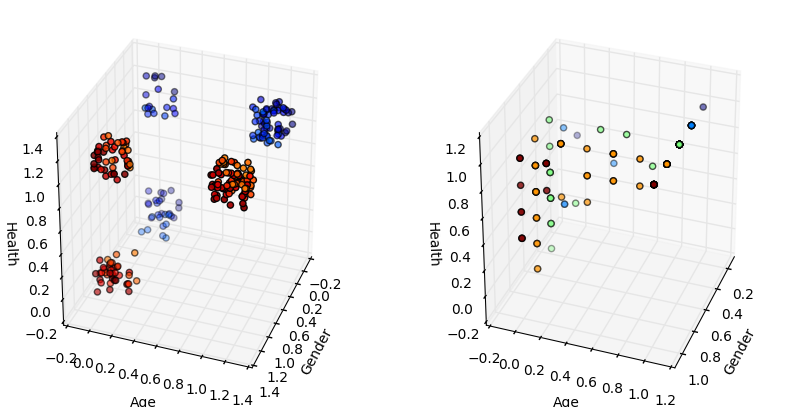

Saved predictions into output/histsSize0smoothed_stats_nBlocks294_bSize8_divs_7_6_7_K-NearestNeighbors_nn5_weights_uniform_p1_ltr0.125_lts_0.190.csv


In [190]:
doStuff(
  do = "nn",nn=5,weights="uniform",p=1,
  #do = "aks",n_est=10,kernel="linear",gamma=1.0/2,coef0=1,deg=2,k1="poly",n_comps=15,C=1,
  #do = "ks",kernel="linear",gamma=1.0/2,coef0=1,deg=3,k1="poly",n_comps=15,C=1,
  #do = "al",n_est=5,al=50,
  #do = "rf",n_est=79,f=0.1,msp=10,max_depth=2,rs=2,
  msplit=70)

===================================================================================================================
### Next steps
* take a look at the empirical distribution (Anteile) of the predicted classes.
   All the real-valued predictions can be plotted in a 3D plot :)
   If there are too few (many) predictions in a class (by comparision to Anteile in training set),
   then move the closest other samples to our class (furthest of current samples to another class).
* Plot real-valued output in 3D
* Use image processing features
* pie output to file and save it as well